### Implementing a back-tester for Random walk strategy

In [4]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date

In [5]:
from mod_my_utils.read_write_data import *
# from mod_my_utils.signal import *

In [6]:
folder_path = 'data/'
stock_name = 'AAPL'
index_col = 'Date'

In [7]:
stock_data = get_price_csv(folder_name=folder_path,symbol=stock_name, index_col=index_col)

stock name:  AAPL


In [8]:
data = stock_data[["Adj. Close"]].copy()
data.columns = ["price"]
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


### Read stock data

In [4]:
symbols = ["HDFC", 'RELIANCE', 'TCS', 'HINDUNILVR', 'INFY', 'HDFC', 'BHARTIARTL', 'ITC', 'ASIANPAINT', 'NESTLEIND', 'HCLTECH', 'SBI', 'SBIN']

In [5]:
symbol = symbols[0]
data_source = "yahoo"
# MM/DD/YYYY
start_date = "1/1/2010"
end_date = "1/1/2015"
print(start_date)
print(end_date)
print(symbol)

1/1/2010
1/1/2015
HDFC


In [6]:
stock_data = get_price_yahoo(symbol=symbol, data_source=data_source, start_date= start_date, end_date= end_date )

stock name HDFC


In [37]:
stock_data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2007-12-03,181.86,184.14,177.70,178.8600,34338200.0,0.0,1.0,23.371545,23.664556,22.836927,22.986003,240367400.0
2007-12-04,177.15,180.90,176.99,179.8100,27635700.0,0.0,1.0,22.766244,23.248171,22.745682,23.108091,193449900.0
2007-12-05,182.89,186.00,182.41,185.5000,31871500.0,0.0,1.0,23.503914,23.903592,23.442227,23.839335,223100500.0
2007-12-06,186.19,190.10,186.12,189.9528,32136100.0,0.0,1.0,23.928010,24.430500,23.919014,24.411582,224952700.0
2007-12-07,190.54,194.99,188.04,194.3000,38073800.0,0.0,1.0,24.487046,25.058933,24.165761,24.970258,266516600.0


In [7]:
data = stock_data[["Adj Close"]].copy() 
data.columns = ['price']
data.head()

,price
Date,
2010-01-04,442.267792
2010-01-05,443.772644
2010-01-06,445.906067
2010-01-07,437.604248
2010-01-08,429.980469


### Abstract Strategy and Portfolio  class

In [9]:
from abc import ABCMeta, abstractmethod

- class in python
- object in python
- object oriented programming with python
- what is self

In [10]:
class Strategy(object):
    """
    Strategy is an abstract base class providing an interface for all subsequent (inherited) trading strategies.
    The goal of a (derived) Strategy object is to output a list of signals, which has the form of a 
    time series indexed pandas DataFrame.
    In this instance only a single symbol/instrument is supported.
    """
    
    __metaclass__ = ABCMeta
    
    @abstractmethod
    def generate_signals(self):
        """
        An implementation is required to return the DataFrame of symbols containing the signals to 
        go long, short or hold (1, -1, 0)
        """
        raise NotImplementedError("Should implement generate_signals()!")


In [11]:
help(Strategy)

Help on class Strategy in module __main__:

class Strategy(builtins.object)
 |  Strategy is an abstract base class providing an interface for all subsequent (inherited) trading strategies.
 |  The goal of a (derived) Strategy object is to output a list of signals, which has the form of a 
 |  time series indexed pandas DataFrame.
 |  In this instance only a single symbol/instrument is supported.
 |  
 |  Methods defined here:
 |  
 |  generate_signals(self)
 |      An implementation is required to return the DataFrame of symbols containing the signals to 
 |      go long, short or hold (1, -1, 0)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  

In [12]:
help(Strategy)

Help on class Strategy in module __main__:

class Strategy(builtins.object)
 |  Strategy is an abstract base class providing an interface for all subsequent (inherited) trading strategies.
 |  The goal of a (derived) Strategy object is to output a list of signals, which has the form of a 
 |  time series indexed pandas DataFrame.
 |  In this instance only a single symbol/instrument is supported.
 |  
 |  Methods defined here:
 |  
 |  generate_signals(self)
 |      An implementation is required to return the DataFrame of symbols containing the signals to 
 |      go long, short or hold (1, -1, 0)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  

In [13]:
# help(object)

In [14]:
class Portfolio(object):
    """
    An abstract base class representing a portfolio of positions (including both instruments and cash), 
    determined on the basis of a set of signals provided by a Strategy."""
    
    __metaclass__ = ABCMeta
    
    @abstractmethod
    def generate_positions(self):
        """
        Provides the logic to determine how the portfolio positions are allocated on the basis of 
        forecasting signals and available cash."""
        raise NotImplementedError("should implement generate_positions()!")
        
    @abstractmethod
    def backtest_portfolio(self):
        """
        Provides the logic to generate the trading orders and subsequent equity curve (i.e. growth of total equity),
        as a sum of holding and cash, and the bar -period returns associated with this curve based on the 
        'positions' DataFrame
        
        Produces a portfolio object that can be examined by other classes/functions."""
        raise NotImplementedError("Should implement backtest_portfolio()")

In [15]:
help(Portfolio)

Help on class Portfolio in module __main__:

class Portfolio(builtins.object)
 |  An abstract base class representing a portfolio of positions (including both instruments and cash), 
 |  determined on the basis of a set of signals provided by a Strategy.
 |  
 |  Methods defined here:
 |  
 |  backtest_portfolio(self)
 |      Provides the logic to generate the trading orders and subsequent equity curve (i.e. growth of total equity),
 |      as a sum of holding and cash, and the bar -period returns associated with this curve based on the 
 |      'positions' DataFrame
 |      
 |      Produces a portfolio object that can be examined by other classes/functions.
 |  
 |  generate_positions(self)
 |      Provides the logic to determine how the portfolio positions are allocated on the basis of 
 |      forecasting signals and available cash.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary

In [16]:
help(Strategy)

Help on class Strategy in module __main__:

class Strategy(builtins.object)
 |  Strategy is an abstract base class providing an interface for all subsequent (inherited) trading strategies.
 |  The goal of a (derived) Strategy object is to output a list of signals, which has the form of a 
 |  time series indexed pandas DataFrame.
 |  In this instance only a single symbol/instrument is supported.
 |  
 |  Methods defined here:
 |  
 |  generate_signals(self)
 |      An implementation is required to return the DataFrame of symbols containing the signals to 
 |      go long, short or hold (1, -1, 0)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  

### Random forecasting Strategy

In [18]:
# random_forecast.py

class RandomForecastingStrategy(Strategy):
    """
    Derives from strategy to produce a set of signals that are randomly generated long/shorts. 
    Clearly a nonsensical strategy, but perfectly acceptable for demonstrating the backtesting infrastructure!
    """
    
    def __init__(self, symbol, bars):
        """
        requires 
        symbol: name of the stock
        bars: stock price
        """
        self.symbol = symbol
        self.bars = bars
        
    def generate_signals(self):
        """
        Creates a pandas DataFrame of random signals.
        """
        
        signals = pd.DataFrame(index = self.bars.index)
        signals['price'] = self.bars['price']
        signals['buy_sell'] = np.sign(np.random.randn(len(signals)))
        
        # The first five elements are set to zero in order to minimise upstream NaN errors in the forecaster.
        signals['buy_sell'][0:5] = 0.0
        return signals[['price', 'buy_sell']]



In [19]:
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


In [20]:
len(data)

2517

In [21]:
np.sign(np.random.randn(len(data)))

array([ 1., -1.,  1., ..., -1., -1.,  1.])

In [22]:
signals = pd.DataFrame(index = data.index)

In [23]:
signals['price'] = data['price']
signals['buy_sell'] = np.sign(np.random.randn(len(signals)))

In [24]:
signals.head()

,price,buy_sell
Date,,
2007-12-03,22.986003,-1.0
2007-12-04,23.108091,1.0
2007-12-05,23.839335,-1.0
2007-12-06,24.411582,1.0
2007-12-07,24.970258,-1.0


In [25]:
rndStrategy = RandomForecastingStrategy('AAPL', data)

In [26]:
signals = rndStrategy.generate_signals()

In [27]:
signals.head(20)

,price,buy_sell
Date,,
2007-12-03,22.986003,0.0
2007-12-04,23.108091,0.0
2007-12-05,23.839335,0.0
2007-12-06,24.411582,0.0
2007-12-07,24.970258,0.0
2007-12-10,24.958692,1.0
2007-12-11,24.230069,-1.0
2007-12-12,24.528170,1.0
2007-12-13,24.652829,1.0


### Portfolio for random forecast

In [28]:
# random_forecast.py

class MarketOnPricePortfolio(Portfolio):
    """
    Inherits Portfolio to create a system that purchases 100 units of a particular symbol upon a long/short signals, 
    assuming the market open price of a bar.
    
    In addition, there are zero transaction costs and cash can be immediately borrowed for shorting (no margin posting or interest
    requirements).
    
    Requires:
    symbol - A stock symbol which forms the basis of the portfolio.
    signals - A pandas DataFrame of signals (1, 0, -1) or each symbol.
    Initial_capital - the amount in cash at the start of the portfolio."""
    
    def __init__(self, symbol, signals, initial_capital=100000.0):
        self.symbol = symbol
        self.signals = signals
        self.initial_capital = float(initial_capital)
        self.positions = self.generate_positions()
        
    def generate_positions(self):
        """
        Creates a 'positions' DataFrame that simply longs or shorts 100 of the particular symbol based on the 
        forecast signals of {1, 0, -1} from the signals DataFrame."""
        positions = pd.DataFrame(index= self.signals.index).fillna(0.0)
        # Buy and sell a 100 shares based on signals and accumulate position
        positions[self.symbol] = 100 * self.signals['buy_sell'].cumsum() 
        return positions
    
    def backtest_portfolio(self):
        """
        Constructs a portfolio from the positions DataFrame by assuming the ability to trade at 
        the precise market price of each bar.
        
        Calculates the total of cash and the holding (market price of each position per bar), in order to 
        generate an equity curve (total) and a set of bar based returns ('return).
        
        Returns the portfolio object to be used elsewhere.
        """
        
        # Construct the portfolio dataframe to use the same index
        # as 'positons' and with a set of 'trading orders' in the
        # 'pos_diff' object, assumping market open prices.
        
        portfolio = pd.DataFrame(index=self.signals.index)
        # Initialize the portfolio with value owned 
        portfolio[self.symbol] = self.positions[self.symbol].multiply(self.signals['price'], axis=0)
        pos_diff = 100 * self.signals[['buy_sell']]
        # add holding to portfolio
        portfolio['holdings'] = (self.positions.multiply(self.signals['price'], axis=0)).sum(axis=1)
        # Add `cash` to portfolio
        portfolio['cash'] = self.initial_capital - (pos_diff.multiply(self.signals['price'], axis=0)).sum(axis=1).cumsum()   
        portfolio['total'] = portfolio['cash'] + portfolio['holdings']
        # return the portfolio
        return portfolio[['holdings', 'cash', 'total']]
        

In [29]:
help(RandomForecastingStrategy)

Help on class RandomForecastingStrategy in module __main__:

class RandomForecastingStrategy(Strategy)
 |  RandomForecastingStrategy(symbol, bars)
 |  
 |  Derives from strategy to produce a set of signals that are randomly generated long/shorts. 
 |  Clearly a nonsensical strategy, but perfectly acceptable for demonstrating the backtesting infrastructure!
 |  
 |  Method resolution order:
 |      RandomForecastingStrategy
 |      Strategy
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, symbol, bars)
 |      requires 
 |      symbol: name of the stock
 |      bars: stock price
 |  
 |  generate_signals(self)
 |      Creates a pandas DataFrame of random signals.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from Strategy:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  -----------

In [30]:
help(MarketOnPricePortfolio)

Help on class MarketOnPricePortfolio in module __main__:

class MarketOnPricePortfolio(Portfolio)
 |  MarketOnPricePortfolio(symbol, signals, initial_capital=100000.0)
 |  
 |  Inherits Portfolio to create a system that purchases 100 units of a particular symbol upon a long/short signals, 
 |  assuming the market open price of a bar.
 |  
 |  In addition, there are zero transaction costs and cash can be immediately borrowed for shorting (no margin posting or interest
 |  requirements).
 |  
 |  Requires:
 |  symbol - A stock symbol which forms the basis of the portfolio.
 |  signals - A pandas DataFrame of signals (1, 0, -1) or each symbol.
 |  Initial_capital - the amount in cash at the start of the portfolio.
 |  
 |  Method resolution order:
 |      MarketOnPricePortfolio
 |      Portfolio
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, symbol, signals, initial_capital=100000.0)
 |      Initialize self.  See help(type(self)) for accurate signature.
 | 

In [31]:
symbol = 'AAPL'

AAPL


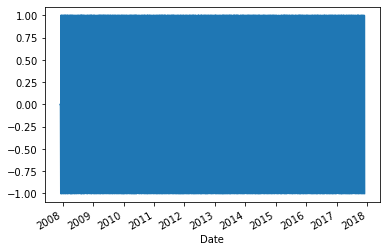

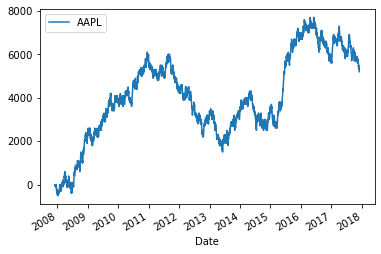

In [32]:
if __name__ == "__main__":
    print(symbol)
    random_strategy = RandomForecastingStrategy(symbol, data)
    signals = random_strategy.generate_signals()
    signals.buy_sell.plot()
    portfolio = MarketOnPricePortfolio(symbol, signals)
    backtest_portfolio = portfolio.backtest_portfolio()
    portfolio.positions.plot()
#     backtest_portfolio.holdings.plot()
    

<AxesSubplot:xlabel='Date'>

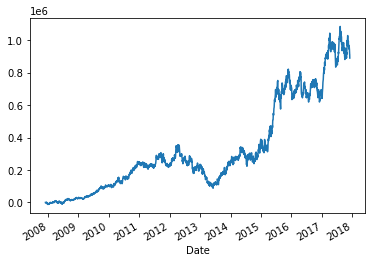

In [33]:
backtest_portfolio.holdings.plot()

<AxesSubplot:xlabel='Date'>

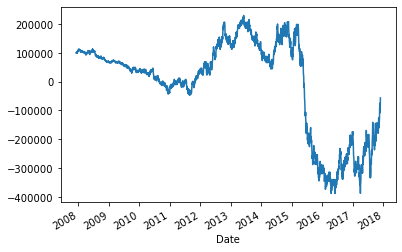

In [34]:
backtest_portfolio.cash.plot()

<AxesSubplot:xlabel='Date'>

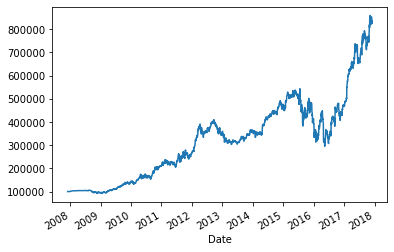

In [35]:
backtest_portfolio.total.plot()

In [36]:
backtest_portfolio['returns'] = backtest_portfolio.total.pct_change()

In [37]:
backtest_portfolio.head()

,holdings,cash,total,returns
Date,,,,
2007-12-03,0.0,100000.0,100000.0,NaN
2007-12-04,0.0,100000.0,100000.0,0.0
2007-12-05,0.0,100000.0,100000.0,0.0
2007-12-06,0.0,100000.0,100000.0,0.0
2007-12-07,0.0,100000.0,100000.0,0.0


In [40]:
signals.head()

,price,buy_sell
Date,,
2007-12-03,22.986003,0.0
2007-12-04,23.108091,0.0
2007-12-05,23.839335,0.0
2007-12-06,24.411582,0.0
2007-12-07,24.970258,0.0


In [41]:
backtest_portfolio.head()

,holdings,cash,total,returns
Date,,,,
2007-12-03,0.0,100000.0,100000.0,NaN
2007-12-04,0.0,100000.0,100000.0,0.0
2007-12-05,0.0,100000.0,100000.0,0.0
2007-12-06,0.0,100000.0,100000.0,0.0
2007-12-07,0.0,100000.0,100000.0,0.0


<AxesSubplot:xlabel='Date'>

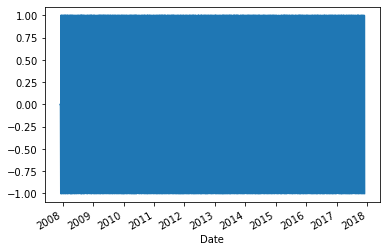

In [42]:
signals.buy_sell.plot()